In [3]:
import pygeostat as gs
% matplotlib inline

Autoloading `gsParams` from C:\Users\nayrm/.gsParams
Autoloading `gsPlotStyle` from C:\Users\nayrm/.gsParams


In [4]:
import spatialcluster as sp

In [5]:
custom = {"savefig.dpi": 125,
            "figure.dpi": 125,
            "figure.figsize": (4, 3),
            "axes.grid": True,
            'grid.alpha': 1.0,
            'grid.color': 'black',
            'grid.linestyle': '-.',
            'grid.linewidth': 0.25,
            "axes.formatter.useoffset": False,
            "xtick.major.pad": 1,
            "ytick.major.pad": 1}
gs.set_style("pt7", custom)

In [6]:
datfl = gs.DataFile("testdat.dat")

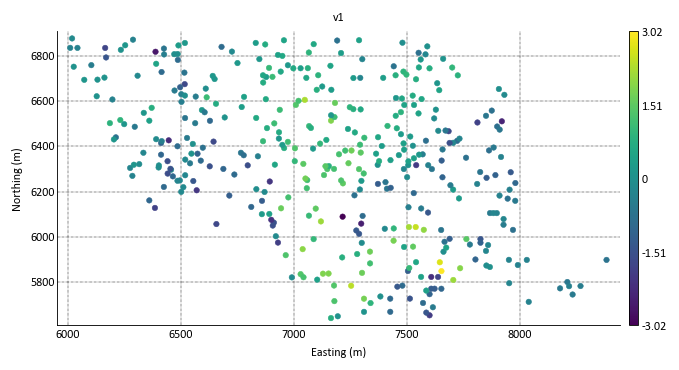

In [7]:
gs.locmap(datfl, var='v1', figsize=(6, 6))

In [8]:
mvdata = datfl.data[['v1', 'v2', 'v3', 'v4']].values

In [10]:
locations = datfl[['X', 'Y']].values

In [11]:
accl = sp.ACCluster(mvdata, locations, acmetric='morans', cluster_method='hier',
                    nnears=5)

In [12]:
accl.fit(3)

In [13]:
datfl.data['final'] = accl.predict()

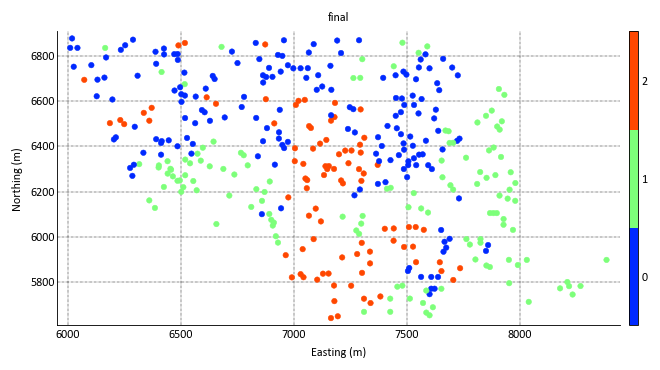

In [14]:
gs.locmap(datfl, var='final', cmap='jet', figsize=(6, 6))

# test the scripting stuff

In [16]:
! where acclus

C:\Anaconda3\Scripts\acclus.exe


In [17]:
acclus = gs.Program('acclus')
parstr = """		  ACCluster
		  ----------

START OF DATA:
testdat.dat        - file with the input dataset
1  2  0             - columns for dh, x, y, z data
3  4  5  6          - columns for variables (implicit nvar)
outfile.out         - file for clustering output
1                   - append output to input file? (0=No, 1=Yes)

START OF AC:        # autocorrelation settings
200                  - number of nearest neighbors
0  0  0             - search anisotropy/ ang1, ang2, ang3
500 500 500         - range1, range2, range3
hier              - cluster method: one of `kmeans`, `gmm`, `hier`
1                   - autocorrelation metrics (1=Morans, 2=Getis)
3                   - number of clusters

"""
acclus.run(parstr=parstr)

C:\GIT\python-local\spatialcluster\spatialcluster\examples\tmph93910s6\accluster.par has been copied to the clipboard
Calling:  ['acclus', 'temp']
Reading parfile from `temp`


In [18]:
datfl.data['final_prog'] = gs.DataFile("outfile.out").data['acc_clusters']

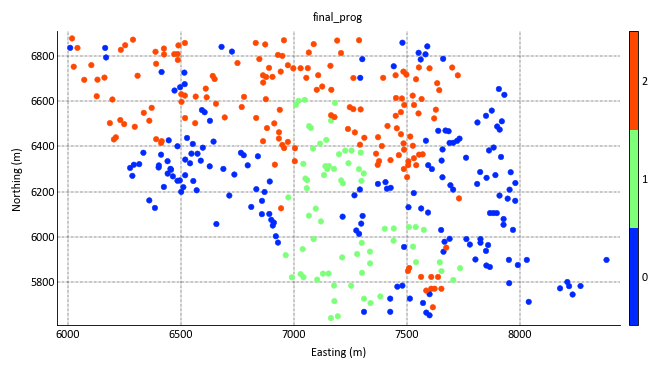

In [19]:
gs.locmap(datfl, var='final_prog', cmap='jet', figsize=(6, 6))